In [1]:
%pip install factor_analyzer

Note: you may need to restart the kernel to use updated packages.


In [63]:
import seaborn as sns
#pandas
import pandas as pd
from pandas.api.types import is_numeric_dtype
#numpy
import numpy as np
#standardizare
from sklearn.preprocessing import StandardScaler
#analiza componente principale
from sklearn.decomposition import PCA
#analiza canonica
from sklearn.cross_decomposition import CCA
#analiza factoriala
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
#analiza clusteri
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_samples,silhouette_score
#analiza discriminanta
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report


import matplotlib.pyplot as plt


#seturi de date in plus:
from sklearn.datasets import load_iris

### 1_ Seturi de date:

In [3]:
df_freelancer_raw = pd.read_csv("input/FreeLancerT.csv")

iris = load_iris()
df_iris = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                 columns = iris['feature_names'] + ['target'])
df_iris['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df_iris.columns = ['s_length', 's_width', 'p_length', 'p_width', 'target', 'species']

In [4]:
df_freelancer_numeric = df_freelancer_raw.select_dtypes('number')
for column in df_freelancer_numeric.columns:
    if(is_numeric_dtype(df_freelancer_numeric[column])) and df_freelancer_numeric[column].isna().any():
        df_freelancer_numeric[column].fillna(df_freelancer_numeric[column].mean(), inplace=True)

/run/user/1000/ipykernel_25998/1918743477.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_freelancer_numeric[column].fillna(df_freelancer_numeric[column].mean(), inplace=True)


#### Freelancer set

In [5]:
df_freelancer_numeric.head()

,C,C_Test,Html,Html_test,Java,Java_test,PHP,PHP_test
0,1.918226,0.140219,4.795565,0.959113,2.877339,0.000000,3.836452,0.000000
1,0.023228,0.003871,0.011614,0.000000,0.023228,0.000000,0.019357,0.000000
2,7.783173,0.241072,4.593976,0.551021,6.956642,0.241072,12.397975,0.860970
3,7.229090,0.000000,7.229090,1.445818,10.120726,0.000000,8.674908,1.445818
4,7.176023,0.291357,7.996140,0.291357,4.478270,0.140283,7.629246,0.151074


#### Iris set

In [6]:
df_iris.head()

,s_length,s_width,p_length,p_width,target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


### 1_ PCA

In [7]:
df_pca = df_freelancer_numeric
scaler = StandardScaler()
df_pca_scaled = pd.DataFrame(scaler.fit_transform(df_pca), columns=df_pca.columns)
df_pca_scaled.head()

,C,C_Test,Html,Html_test,Java,Java_test,PHP,PHP_test
0,-0.210758,8.308614e-17,0.028161,0.197016,-0.107550,-0.468369,-0.151652,-0.196686
1,-0.353704,-4.081568e-01,-0.640136,-0.179024,-0.557956,-0.468369,-0.681605,-0.196686
2,0.231656,3.019011e-01,0.000000,0.037015,0.536203,0.162512,1.037001,0.133040
3,0.189860,-4.197456e-01,0.368114,0.387838,1.035526,-0.468369,0.520103,0.357019
4,0.185857,4.524307e-01,0.475267,-0.064791,0.145092,-0.101250,0.374927,-0.138829


### 1.1_ PCA - Matricea de varianta componente - factori 

In [8]:

n = df_pca_scaled.shape[0]
m = df_pca_scaled.shape[1]
print(f'{n} + {m}')

190 + 8


In [9]:
pca_model = PCA()
pca_model.fit(df_pca_scaled)

#Matricea de varianta se calculeaza intre variabile observate - componente
#!!Componentele se afla prin pca_model.transorm(df)!!
scores = pca_model.transform(df_pca_scaled)
df_scores = pd.DataFrame(pca_model.transform(df_pca_scaled), columns=[f'C{i}' for i in range(m)])


In [10]:
df_scores

,C0,C1,C2,C3,C4,C5,C6,C7
0,-0.287639,-0.177674,-0.343975,0.088469,-0.046247,0.240804,-0.174384,0.213687
1,-1.225225,-0.453536,0.039651,0.226486,-0.086667,-0.000584,-0.010200,-0.011092
2,0.885213,0.289122,-0.218270,-0.305579,0.287806,-0.631162,-0.074026,0.241421
3,0.888504,-0.660004,-0.383869,-0.701948,0.295477,0.023153,-0.484474,-0.011074
4,0.473320,0.400290,-0.461669,-0.052866,0.123218,0.134755,0.146732,0.073429
...,...,...,...,...,...,...,...,...
185,-1.127658,-0.443622,0.004857,0.147977,-0.069879,-0.022494,0.011915,0.006181
186,-0.339144,-0.570300,-0.110033,-0.178689,0.179102,-0.016392,-0.154526,-0.001917
187,-1.218184,-0.458669,0.039712,0.213400,-0.091607,0.002709,-0.008837,-0.011177
188,-0.971552,-0.345854,0.005831,0.136596,-0.056836,0.022390,0.006420,-0.016927


In [11]:
variance_matrix = np.corrcoef(df_pca_scaled, df_scores, rowvar=False)[:m,m:]
df_variance_matrix = pd.DataFrame(variance_matrix, df_pca_scaled.columns, df_scores.columns)
df_variance_matrix

,C0,C1,C2,C3,C4,C5,C6,C7
C,0.887939,-0.436691,0.037853,0.005981,0.071273,0.006500,0.119419,0.003733
C_Test,0.593289,0.674108,-0.187286,0.390274,0.078635,-0.001776,0.000684,0.002950
Html,0.875333,0.383519,-0.182143,-0.158349,-0.106187,0.129799,0.006160,-0.017143
Html_test,0.824534,-0.527654,0.089337,0.139983,-0.089924,0.047078,-0.042505,0.045151
Java,0.944902,-0.178840,0.052454,-0.141682,0.218706,0.019391,-0.063714,-0.009113
Java_test,0.552312,0.648299,0.522434,-0.008387,-0.037869,-0.012668,0.007012,-0.003014
PHP,0.876188,0.356210,-0.197738,-0.220433,-0.044703,-0.123024,-0.000825,0.024150
PHP_test,0.852154,-0.485837,-0.001851,0.138448,-0.104930,-0.071216,-0.023158,-0.044794


### 1.2_ Corelograma matrice varianta componenete

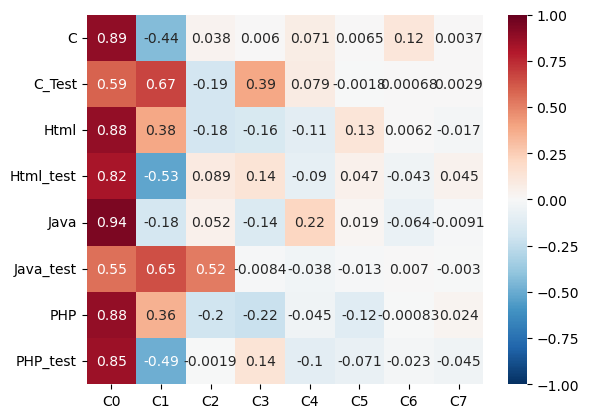

In [12]:
from factor_analyzer import FactorAnalyzer
corelogram = sns.heatmap(
    df_variance_matrix,
    cmap="RdBu_r",
    vmax=1,
    vmin=-1,
    center=0,
    annot=True
)

### 1.3_ Cosinusuri

In [13]:
scores_squared = scores * scores

In [14]:
cosin = (scores_squared.T / np.sum(scores_squared, axis=1)).T
df_cosin = pd.DataFrame(cosin, columns=df_pca_scaled.columns)
df_cosin.head()

,C,C_Test,Html,Html_test,Java,Java_test,PHP,PHP_test
0,0.219666,0.083813,0.314137,0.020780,0.005678,1.539550e-01,0.080738,0.121233
1,0.849333,0.116378,0.000890,0.029022,0.004250,1.931255e-07,0.000059,0.000070
2,0.504516,0.053820,0.030674,0.060121,0.053331,2.564844e-01,0.003528,0.037526
3,0.360835,0.199106,0.067353,0.225216,0.039906,2.450126e-04,0.107283,0.000056
4,0.339205,0.242606,0.322712,0.004232,0.022988,2.749436e-02,0.032599,0.008164


### 1.4_ Contributii

In [15]:
contrib = (scores_squared * 100 / np.sum(scores_squared, axis=0))
df_contrib = pd.DataFrame(contrib, columns=df_pca_scaled.columns)
df_contrib.head()

,C,C_Test,Html,Html_test,Java,Java_test,PHP,PHP_test
0,0.008250,0.008810,0.158674,0.014458,0.012117,0.765802,0.771272,4.771194
1,0.149688,0.057407,0.002108,0.094755,0.042554,0.000005,0.002639,0.012856
2,0.078136,0.023330,0.063891,0.172491,0.469277,5.261009,0.138982,6.090043
3,0.078718,0.121573,0.197615,0.910187,0.494626,0.007079,5.953034,0.012813
4,0.022339,0.044719,0.285834,0.005163,0.086015,0.239816,0.546069,0.563384


### 1.5_ Comunalitati
!! Se alcatuiesc din matrice de varianta

In [16]:
communalities = np.cumsum(df_variance_matrix.values, axis=1)
df_communalities = pd.DataFrame(communalities, columns=df_pca_scaled.columns)
df_communalities

,C,C_Test,Html,Html_test,Java,Java_test,PHP,PHP_test
0,0.887939,0.451248,0.489100,0.495081,0.566354,0.572854,0.692273,0.696006
1,0.593289,1.267398,1.080112,1.470386,1.549021,1.547245,1.547929,1.550879
2,0.875333,1.258852,1.076709,0.918359,0.812172,0.941971,0.948132,0.930988
3,0.824534,0.296880,0.386218,0.526201,0.436277,0.483355,0.440850,0.486001
4,0.944902,0.766062,0.818517,0.676835,0.895540,0.914932,0.851218,0.842105
5,0.552312,1.200611,1.723045,1.714658,1.676789,1.664121,1.671133,1.668119
6,0.876188,1.232399,1.034661,0.814228,0.769525,0.646500,0.645675,0.669825
7,0.852154,0.366317,0.364466,0.502914,0.397984,0.326768,0.303610,0.258816


### 1.6_ Grafic comunalitati

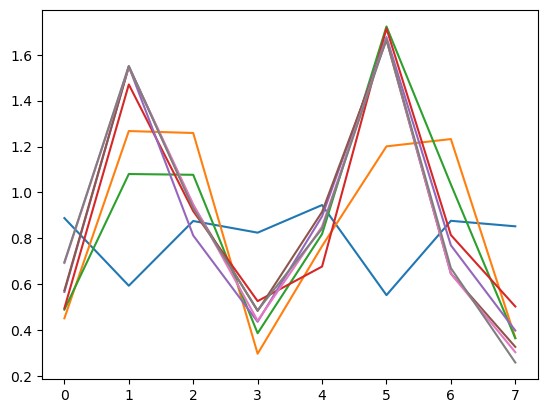

In [17]:
plt.plot(communalities)

### 1.8_ Variante

In [18]:
explained_variance = pca_model.explained_variance_
explained_variance_ratio = pca_model.explained_variance_ratio_
explained_variance_cumulative = np.cumsum(explained_variance_ratio)
df_variances = pd.DataFrame()
df_variances['raw_explained_var'] = explained_variance 
df_variances['explained_variance_ratio'] = explained_variance_ratio
df_variances['explained_variance_ratio_cumsum'] = explained_variance_cumulative

df_variances

,raw_explained_var,explained_variance_ratio,explained_variance_ratio_cumsum
0,5.306181,0.659782,0.659782
1,1.895803,0.235728,0.895510
2,0.394535,0.049057,0.944567
3,0.286429,0.035615,0.980182
4,0.093392,0.011613,0.991795
5,0.040064,0.004982,0.996776
6,0.020861,0.002594,0.999370
7,0.005064,0.000630,1.000000


### 1.9_ Plot varianta explicata

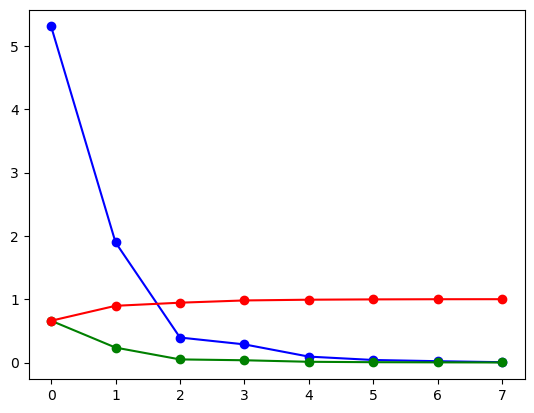

In [19]:
plt.plot(explained_variance, 'bo-')
plt.plot(explained_variance_ratio, 'go-')
plt.plot(explained_variance_cumulative, 'ro-')

## 2_ Analiza factoriala

In [20]:
scaler = StandardScaler()
df_fac_anal = pd.DataFrame(scaler.fit_transform(df_freelancer_numeric), columns = df_freelancer_numeric.columns)
df_fac_anal.head()

,C,C_Test,Html,Html_test,Java,Java_test,PHP,PHP_test
0,-0.210758,8.308614e-17,0.028161,0.197016,-0.107550,-0.468369,-0.151652,-0.196686
1,-0.353704,-4.081568e-01,-0.640136,-0.179024,-0.557956,-0.468369,-0.681605,-0.196686
2,0.231656,3.019011e-01,0.000000,0.037015,0.536203,0.162512,1.037001,0.133040
3,0.189860,-4.197456e-01,0.368114,0.387838,1.035526,-0.468369,0.520103,0.357019
4,0.185857,4.524307e-01,0.475267,-0.064791,0.145092,-0.101250,0.374927,-0.138829


### 2.1_ Testul KMO 

In [21]:
kmo_test = calculate_kmo(df_fac_anal)
df_kmo = pd.DataFrame(kmo_test[0], index=df_fac_anal.columns, columns=['KMO_test_values'])
print(f'Overall KMO value: {kmo_test[1]}')
df_kmo

Overall KMO value: 0.6943569290171081


,KMO_test_values
C,0.861932
C_Test,0.761642
Html,0.671792
Html_test,0.609008
Java,0.801619
Java_test,0.723773
PHP,0.617694
PHP_test,0.611191


### 2.2_ Testul Bartlett

In [22]:
bartlett_test = calculate_bartlett_sphericity(df_fac_anal)
print(f'chi_square_val: {bartlett_test[0]} + p-value: {bartlett_test[1]}')

chi_square_val: 2719.016294773776 + p-value: 0.0


### 2.3_ Varianta factori 

In [23]:
fa_model = FactorAnalyzer(rotation='Varimax', n_factors=df_fac_anal.shape[1])
fa_model.fit(df_fac_anal)

varianta_factori = fa_model.get_factor_variance()
df_varianta = pd.DataFrame(varianta_factori, index=[['varinta', 'varianta_proportionala', 'varianta_cumulata']], columns=[f'F{i}' for i in range(df_fac_anal.shape[1])])
df_varianta

,F0,F1,F2,F3,F4,F5,F6,F7
varinta,3.686688,1.841267,1.126208,1.073060,0.116777,0.035331,0.007813,0.000000
varianta_proportionala,0.460836,0.230158,0.140776,0.134133,0.014597,0.004416,0.000977,0.000000
varianta_cumulata,0.460836,0.690994,0.831770,0.965903,0.980500,0.984916,0.985893,0.985893


### 2.4 Matrice de corelatie factoriala

In [24]:
corr_matrix = fa_model.loadings_
df_corr_matrix = pd.DataFrame(corr_matrix, index=df_fac_anal.columns, columns=[f'F{i}' for i in range(df_fac_anal.shape[1])])
df_corr_matrix

,F0,F1,F2,F3,F4,F5,F6,F7
C,0.938632,0.272059,0.077632,0.053959,0.108262,0.000337,0.075029,0.0
C_Test,0.058419,0.385178,0.338765,0.853404,0.012647,-0.002304,0.000246,0.0
Html,0.360402,0.783627,0.318617,0.364454,-0.000920,0.129246,0.000552,0.0
Html_test,0.983172,0.126000,0.058380,0.046124,-0.049539,0.054383,-0.040162,0.0
Java,0.795755,0.448549,0.235214,0.104512,0.306219,-0.004493,0.004227,0.0
Java_test,0.061222,0.301521,0.870719,0.287865,0.021972,0.000553,0.001050,0.0
PHP,0.366132,0.810065,0.294718,0.320625,0.047899,-0.113111,0.003748,0.0
PHP_test,0.966799,0.201556,0.012593,0.101525,-0.076773,-0.053376,-0.023175,0.0


### 2.5_ Corelograma corelatii factoriale

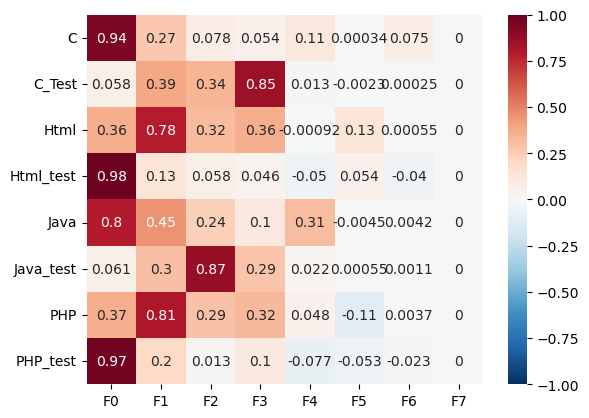

In [25]:
corelogram = sns.heatmap(
    df_corr_matrix,
    vmin=-1,
    vmax=1,
    cmap='RdBu_r',
    center=0,
    label=True,
    annot=True
)

### 2.6_ Calcul comunalitati

In [26]:
communalities = fa_model.get_communalities()
df_communalities = pd.DataFrame(communalities, index=df_fac_anal.columns, columns=['comunalitati'])
df_communalities


,comunalitati
C,0.981334
C_Test,0.995000
Html,0.995010
Html_test,0.995064
Java,0.994478
Java_test,0.936165
PHP,0.995019
PHP_test,0.995072


### 2.7_ Calcul scoruri

In [27]:
scores = fa_model.transform(df_fac_anal)
df_scores = pd.DataFrame(scores, columns=df_fac_anal.columns)
df_scores.head()

,C,C_Test,Html,Html_test,Java,Java_test,PHP,PHP_test
0,-0.034543,-0.013916,-0.330898,0.131680,0.023327,1.081244,-0.937459,0.0
1,-0.101693,-0.630243,-0.287026,-0.067398,-0.381534,0.032176,-0.077366,0.0
2,0.016830,0.599058,0.098335,0.009817,0.772387,-3.085512,-0.427555,0.0
3,0.345370,0.856563,-0.482845,-0.728181,1.624543,-0.036670,-1.585707,0.0
4,-0.165915,0.530841,-0.325460,0.420584,0.301805,0.571329,0.500915,0.0


## 3_ Analiza discriminata

In [ ]:
df_iris_predictor = df_iris.iloc[:, :-2]
df_iris_result = pd.DataFrame(df_iris.iloc[:, df_iris.shape[1]-1])

### 3.1_ Scoruri discriminate

In [ ]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(df_iris_predictor, df_iris_result)

scores = lda_model.transform(df_iris_predictor)
#df_scores = pd.DataFrame(scores, columns=df_iris_predictor.columns)
df_scores = pd.DataFrame(scores, columns=[f'LD{i}' for i in range(scores.shape[1])])
df_scores

/nix/store/1d6cjhp004crgy316ycwh2dlk25c72p0-python3.12-scikit-learn-1.5.0/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,LD0,LD1
0,8.061800,-0.300421
1,7.128688,0.786660
2,7.489828,0.265384
3,6.813201,0.670631
4,8.132309,-0.514463
...,...,...
145,-5.645003,-1.677717
146,-5.179565,0.363475
147,-4.967741,-0.821141
148,-5.886145,-2.345091


### 3.2_ Predictia in setul de testare model liniar

In [ ]:
linear_predictions = lda_model.predict(df_iris_predictor)
df_iris_predictions = df_iris
df_iris_predictions['predicted_species'] = linear_predictions
df_iris_predictions

,s_length,s_width,p_length,p_width,target,species,predicted_species
0,5.1,3.5,1.4,0.2,0.0,setosa,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa,setosa
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica,virginica


### 3.3_ Scoruri predictie model liniar

In [ ]:
scores = lda_model.score(df_iris_predictor, linear_predictions)
report = classification_report(df_iris_result, linear_predictions)
conf_matrix = confusion_matrix(df_iris_result, linear_predictions)
print(f'{scores}\n{report}\n{conf_matrix}')

1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.96      0.97        50
   virginica       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150

[[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]


### 3.... --> Idem la modelul bayesian --> QuadraticDiscriminantAnalysis

## 4_ Analiza de clusteri

In [ ]:
df_freelancer = pd.read_csv('input/FreeLancerT.csv')
df_freelancer_numeric = df_freelancer.select_dtypes('number')
for column in df_freelancer_numeric.columns:
    if df_freelancer_numeric[column].isna().any():
        df_freelancer_numeric[column].fillna(df_freelancer_numeric[column].mean(), inplace=True)

df_freelancer_numeric.head()

/run/user/1000/ipykernel_25998/4188432084.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_freelancer_numeric[column].fillna(df_freelancer_numeric[column].mean(), inplace=True)


,C,C_Test,Html,Html_test,Java,Java_test,PHP,PHP_test
0,1.918226,0.140219,4.795565,0.959113,2.877339,0.000000,3.836452,0.000000
1,0.023228,0.003871,0.011614,0.000000,0.023228,0.000000,0.019357,0.000000
2,7.783173,0.241072,4.593976,0.551021,6.956642,0.241072,12.397975,0.860970
3,7.229090,0.000000,7.229090,1.445818,10.120726,0.000000,8.674908,1.445818
4,7.176023,0.291357,7.996140,0.291357,4.478270,0.140283,7.629246,0.151074


In [ ]:
scaler = StandardScaler()
df_cluster_scaled = pd.DataFrame(scaler.fit_transform(df_freelancer_numeric), columns=df_freelancer_numeric.columns)
df_cluster_scaled.head()

,C,C_Test,Html,Html_test,Java,Java_test,PHP,PHP_test
0,-0.210758,8.308614e-17,0.028161,0.197016,-0.107550,-0.468369,-0.151652,-0.196686
1,-0.353704,-4.081568e-01,-0.640136,-0.179024,-0.557956,-0.468369,-0.681605,-0.196686
2,0.231656,3.019011e-01,0.000000,0.037015,0.536203,0.162512,1.037001,0.133040
3,0.189860,-4.197456e-01,0.368114,0.387838,1.035526,-0.468369,0.520103,0.357019
4,0.185857,4.524307e-01,0.475267,-0.064791,0.145092,-0.101250,0.374927,-0.138829


### 4.1_ Calcul matrice de ierarhie 

In [ ]:
linkage_matrix = linkage(df_cluster_scaled, method='ward')
df_linkage_matrix = pd.DataFrame(linkage_matrix, columns=[['Point1', 'Point2', 'Distance', 'New_Clusters']])
df_linkage_matrix

,Point1,Point2,Distance,New_Clusters
0,116.0,128.0,0.000785,2.0
1,12.0,190.0,0.001003,3.0
2,118.0,174.0,0.001517,2.0
3,124.0,154.0,0.002591,2.0
4,15.0,141.0,0.002748,2.0
...,...,...,...,...
184,368.0,372.0,9.656525,51.0
185,6.0,373.0,11.563026,5.0
186,374.0,375.0,20.811723,56.0
187,371.0,376.0,27.069668,189.0


### 4.2_ Calcul partitie optima folosind metoda Elbow 

In [ ]:
total_points = linkage_matrix.shape[0] + 1
num_steps = total_points - 2

diffecences_vector = np.zeros(num_steps)

for i in range(num_steps):
    diffecences_vector[i] = linkage_matrix[i+1,2] - linkage_matrix[i, 2]

elbow_point = np.argmax(diffecences_vector) + 1
treshold = (linkage_matrix[elbow_point, 2] + linkage_matrix[elbow_point - 1, 2]) / 2
opt_partition = fcluster(Z=linkage_matrix, t=treshold, criterion='distance')
opt_partition

array([1, 1, 2, 2, 2, 1, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 3,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 4, 1, 2, 2, 1,
       3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1,
       2, 2, 1, 1, 1, 3, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
opt_partition = pd.DataFrame(opt_partition)

### 4.3_ Calcul indcsi Sihouette

In [ ]:
silhouette = silhouette_samples(df_cluster_scaled, opt_partition)


/nix/store/1d6cjhp004crgy316ycwh2dlk25c72p0-python3.12-scikit-learn-1.5.0/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
df_silhouette = pd.DataFrame(silhouette, columns=['silhouette_scores'])
df_silhouette['partitons'] = opt_partition
df_silhouette

,silhouette_scores,partitons
0,0.593687,1
1,0.863584,1
2,0.203000,2
3,0.009308,2
4,0.007537,2
...,...,...
185,0.871352,1
186,0.639850,1
187,0.865635,1
188,0.862766,1


In [ ]:
silh_score = silhouette_score(df_cluster_scaled, opt_partition)
print(silh_score)

0.6057049707127926


/nix/store/1d6cjhp004crgy316ycwh2dlk25c72p0-python3.12-scikit-learn-1.5.0/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 4.4_ Deondrogram

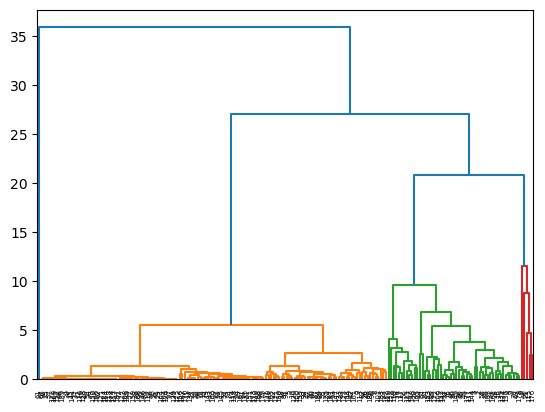

In [ ]:
dend = dendrogram(linkage_matrix, color_threshold=treshold)

## 5_ Analiza canonica

In [ ]:
iris = load_iris()
df_iris = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                 columns = iris['feature_names'] + ['target'])
df_iris['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df_iris.columns = ['s_length', 's_width', 'p_length', 'p_width', 'target', 'species']

In [ ]:
df_iris_sepal = df_iris.iloc[:, :2]
df_iris_petal = df_iris.iloc[:, 2:-2]

In [ ]:
cca_model = CCA()
cca_model.fit(df_iris_petal, df_iris_sepal)

CCA()

### 5.1_ Calcul scoruri canonice

In [ ]:
cca_scores = cca_model.transform(df_iris_petal, df_iris_sepal)
df_cca_scores_petal = pd.DataFrame(cca_scores[0], columns=df_iris_petal.columns)
df_cca_scores_sepal = pd.DataFrame(cca_scores[1], columns=df_iris_sepal.columns)

In [ ]:
df_cca_scores_petal.head()

,p_length,p_width
0,-0.823458,-0.121022
1,-0.823458,-0.121022
2,-0.876879,-0.038682
3,-0.770038,-0.203361
4,-0.823458,-0.121022


In [ ]:
df_cca_scores_sepal.head()

,s_length,s_width
0,-1.221412,0.495146
1,-0.998909,-0.638971
2,-1.399556,-0.340147
3,-1.421836,-0.600147
4,-1.421735,0.644558


### 5.2_ Calcul corelatii variabile observate - variabile canonice

In [ ]:
m = df_iris_petal.shape[1]
m

2

In [ ]:
corr_petal = np.corrcoef(df_iris_petal, df_cca_scores_petal, rowvar=False)[:m,m:]
df_corr_petal = pd.DataFrame(corr_petal, index=df_iris_petal.columns, columns=[f'CA{i}' for i in range(corr_petal.shape[1])])
df_corr_petal

,CA0,CA1
p_length,0.989755,0.142777
p_width,0.914453,0.404691


In [ ]:
corr_sepal = np.corrcoef(df_iris_sepal, df_cca_scores_sepal, rowvar=False)[:m,m:]
df_corr_sepal = pd.DataFrame(corr_sepal, index=df_iris_sepal.columns, columns=[f'CA{i}' for i in range(corr_sepal.shape[1])])
df_corr_sepal

,CA0,CA1
s_length,0.929001,0.370077
s_width,-0.476733,0.879048


### 5.3_ Calcul corelatii variabile canonice

In [100]:
m = df_cca_scores_sepal.shape[1]

In [102]:
corr_canonic = np.corrcoef(df_cca_scores_petal, df_cca_scores_sepal, rowvar=False)[:m,m:]
corr_canonic

array([[ 9.40968997e-01,  5.77559909e-17],
       [-2.53295906e-07,  1.23936881e-01]])

### 5.4_ Calcul varianta explicata

In [109]:
variance_petal = np.var(df_cca_scores_petal) / np.sum(np.var(df_cca_scores_petal))
variance_sepal = np.var(df_cca_scores_sepal) / np.sum(np.var(df_cca_scores_sepal))


/nix/store/fvxlmgcjanv8j0qxzxxgxigq1344zn39-python3.12-numpy-1.26.4/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


p_length    0.682459
p_width     0.317541
dtype: float64

### 5.5_ Redundanta explicata

In [112]:
redund_petal = np.var(df_cca_scores_petal) / 

0.3795266184101347